In [1]:
import pandas as pd
import os

from harness.test_harness_class import TestHarness
from harness.th_model_instances.hamed_models.random_forest_regression import random_forest_regression
from harness.utils.names import Names
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering


import logging

l = logging.getLogger()
l.setLevel(logging.DEBUG)


In [2]:
print(os.getcwd())
df = pd.read_csv(os.path.join(os.getcwd(), '../resources/accuracy_set.csv'), index_col=0, dtype={'input' : object, 'output': object})
df.columns
                 

/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/pysd2cat/notebooks


Index(['count', 'count_live', 'filename', 'gate', 'growth_media_1', 'growth_media_2', 'id', 'inc_temp', 'inc_time_1', 'inc_time_2', 'index', 'input', 'lab', 'lab_id', 'mean_correct_classifier', 'mean_correct_classifier_live', 'mean_correct_high_classifier', 'mean_correct_high_classifier_live', 'mean_correct_high_threshold', 'mean_correct_high_threshold_live', 'mean_correct_low_classifier', 'mean_correct_low_classifier_live', 'mean_correct_low_threshold', 'mean_correct_low_threshold_live', 'mean_correct_threshold', 'mean_correct_threshold_live', 'mean_log_gfp', 'mean_log_gfp_live', 'media', 'od', 'od_cutoff', 'output', 'plan', 'plate_id', 'replicate', 'source_container', 'std_correct_classifier', 'std_correct_classifier_live', 'std_correct_high_classifier', 'std_correct_high_classifier_live', 'std_correct_high_threshold', 'std_correct_high_threshold_live', 'std_correct_low_classifier', 'std_correct_low_classifier_live', 'std_correct_low_threshold', 'std_correct_low_threshold_live', 'std

In [109]:
grna_df = pd.read_csv(os.path.join(os.getcwd(), '../resources/yg_grna.csv'))
df = df.merge(grna_df, on='strain_name', how='left')



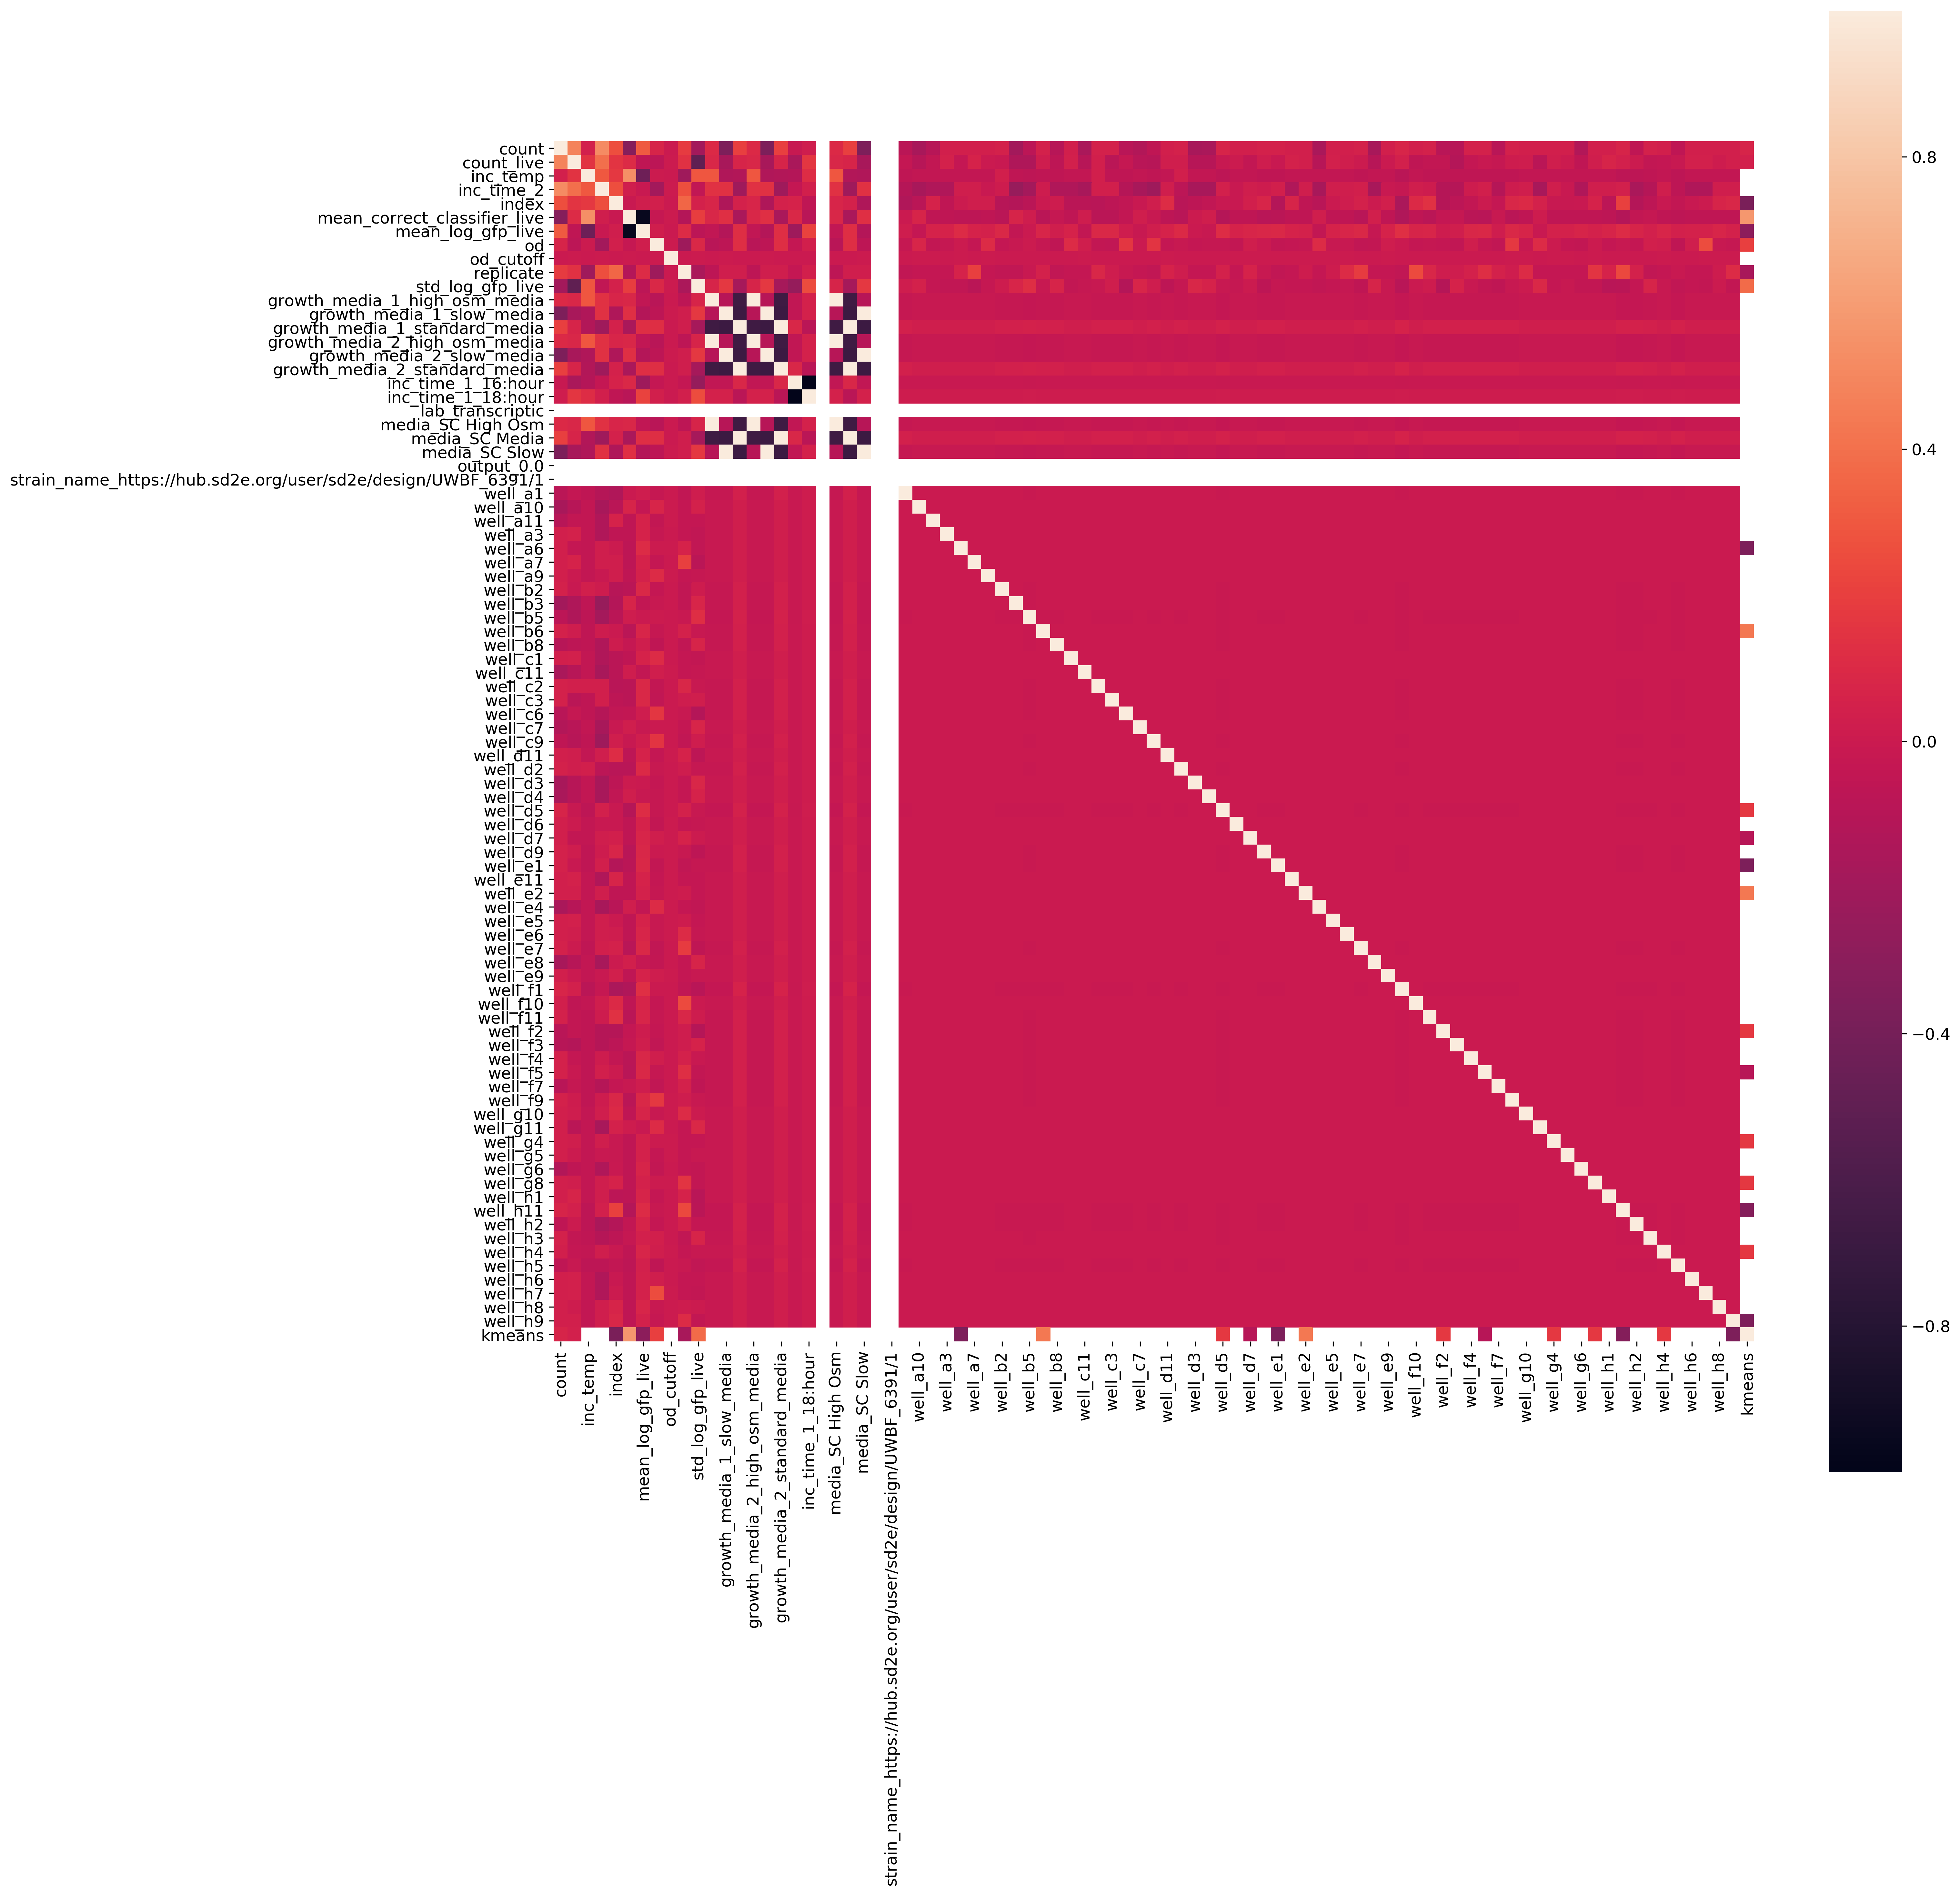

In [202]:
cor = data_df.corr() #Calculate the correlation of the above variables
fig, ax = plt.subplots(figsize=(20,20), dpi=300) 
sns.heatmap(cor,square = True)

In [ ]:
y_col = 'mean_correct_classifier_live'
correctness_cols = ['mean_correct_threshold', 'mean_correct_classifier', 'mean_correct_threshold_live', 
                    'std_correct_threshold_live','std_correct_classifier_live', 'std_correct_threshold',
                   'std_correct_classifier', ]
output_location = '.'
ignore_cols = ['filename', 'id', 'lab_id', 'plan', 'source_container', 'strain_name', 'plate_id']
ignore_cols.extend(correctness_cols)
description = 'foo'

data_df = df
#data_df = data_df.loc[(data_df['gate'] == 'OR') & (data_df['input'] == '10')]


data_df = pd.get_dummies(data_df.drop(columns=ignore_cols)).dropna()




In [199]:

data_df = data_df.dropna()
ss = StandardScaler()
ss.fit_transform(data_df)

#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(data_df, nclust=4)
kmeans = pd.DataFrame(clust_labels)
data_df.insert((data_df.shape[1]),'kmeans',kmeans)

In [200]:
data_df.columns

Index(['count', 'count_live', 'inc_temp', 'inc_time_2', 'index', 'mean_correct_classifier_live', 'mean_log_gfp_live', 'od', 'od_cutoff', 'replicate', 'std_log_gfp_live', 'growth_media_1_high_osm_media', 'growth_media_1_slow_media', 'growth_media_1_standard_media', 'growth_media_2_high_osm_media', 'growth_media_2_slow_media', 'growth_media_2_standard_media', 'inc_time_1_16:hour', 'inc_time_1_18:hour', 'lab_transcriptic', 'media_SC High Osm', 'media_SC Media', 'media_SC Slow', 'output_0.0', 'strain_name_https://hub.sd2e.org/user/sd2e/design/UWBF_6391/1', 'well_a1', 'well_a10', 'well_a11', 'well_a3', 'well_a6', 'well_a7', 'well_a9', 'well_b2', 'well_b3', 'well_b5', 'well_b6', 'well_b8', 'well_c1', 'well_c11', 'well_c2', 'well_c3', 'well_c6', 'well_c7', 'well_c9', 'well_d11', 'well_d2', 'well_d3', 'well_d4', 'well_d5', 'well_d6', 'well_d7', 'well_d9', 'well_e1', 'well_e11', 'well_e2', 'well_e4', 'well_e5', 'well_e6', 'well_e7', 'well_e8', 'well_e9', 'well_f1', 'well_f10', 'well_f11', 'well

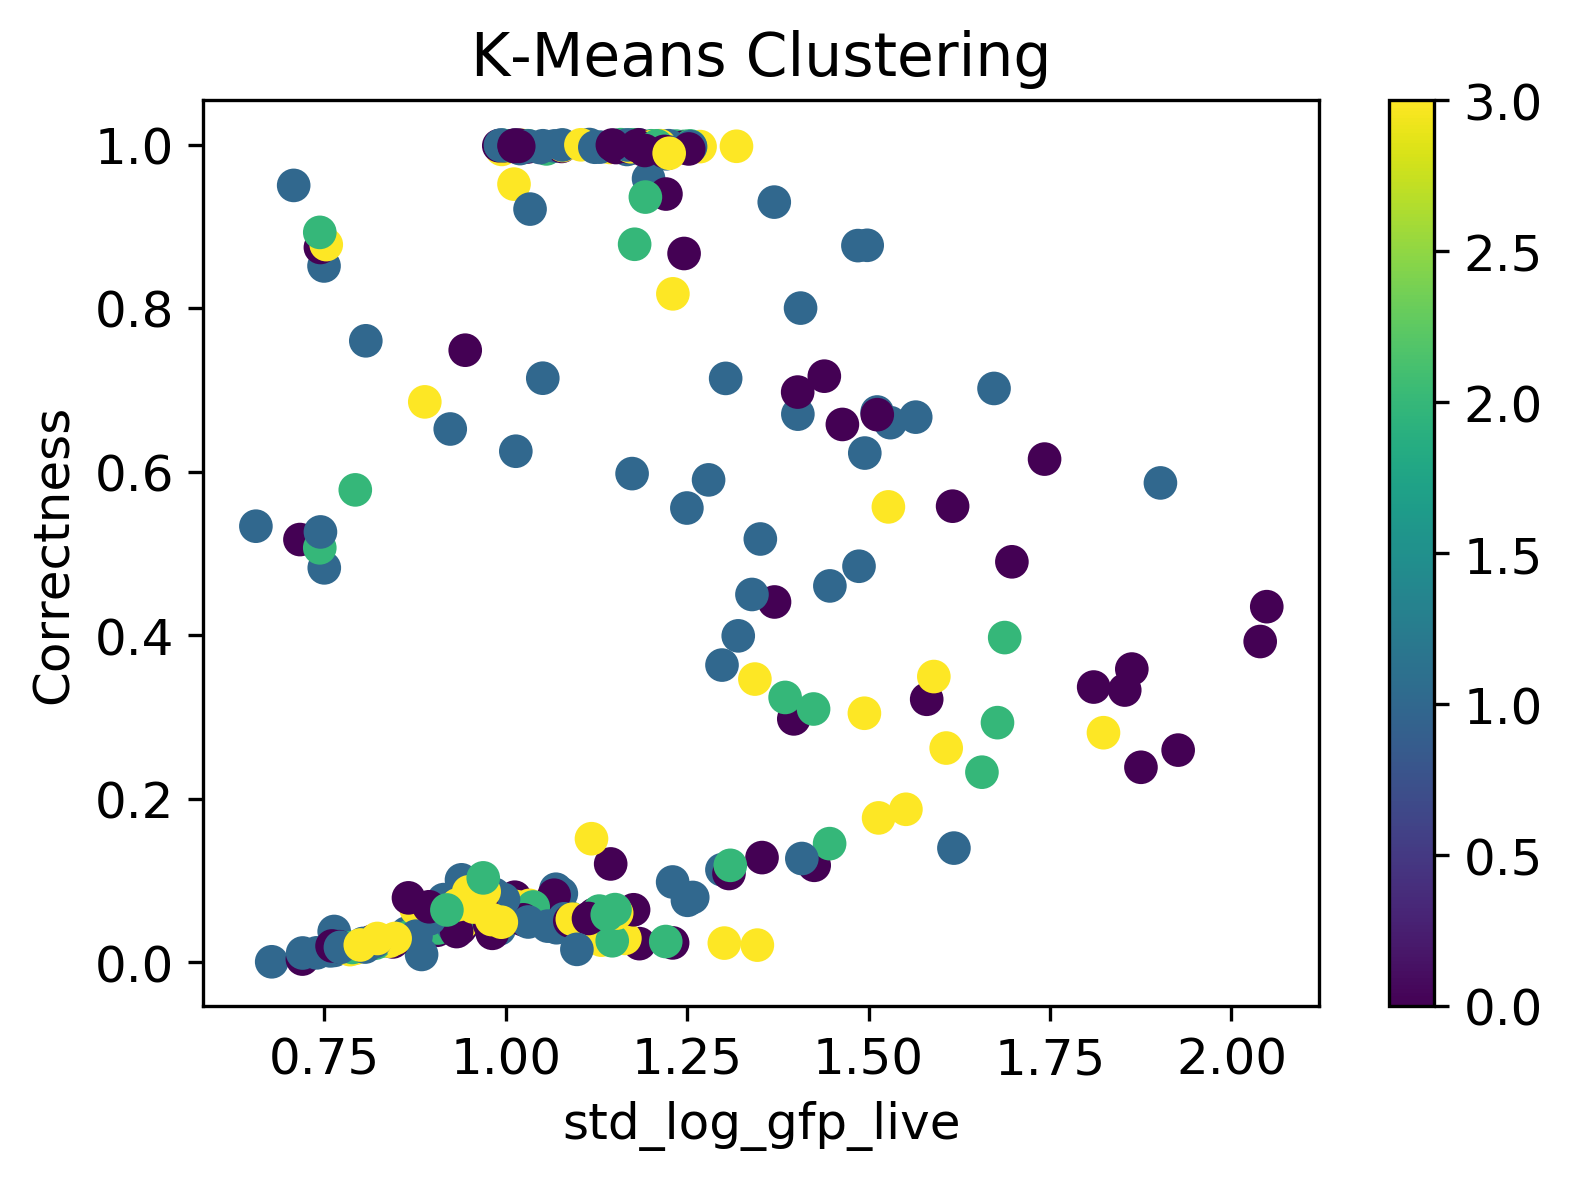

In [201]:
#Plot the clusters obtained using k means
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
#xval='mean_log_gfp_live'
xval = 'std_log_gfp_live'
scatter = ax.scatter(data_df[xval],data_df[y_col],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel(xval)
ax.set_ylabel('Correctness')
plt.colorbar(scatter)

In [23]:
def doAgglomerative(X, nclust=2):
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(data_df.dropna(), 4)
agglomerative = pd.DataFrame(clust_labels1)
data_df.loc[:, 'agglomerative'] = agglomerative

ValueError: 'c' argument has 1566 elements, which is not acceptable for use with 'x' with size 3647, 'y' with size 3647.

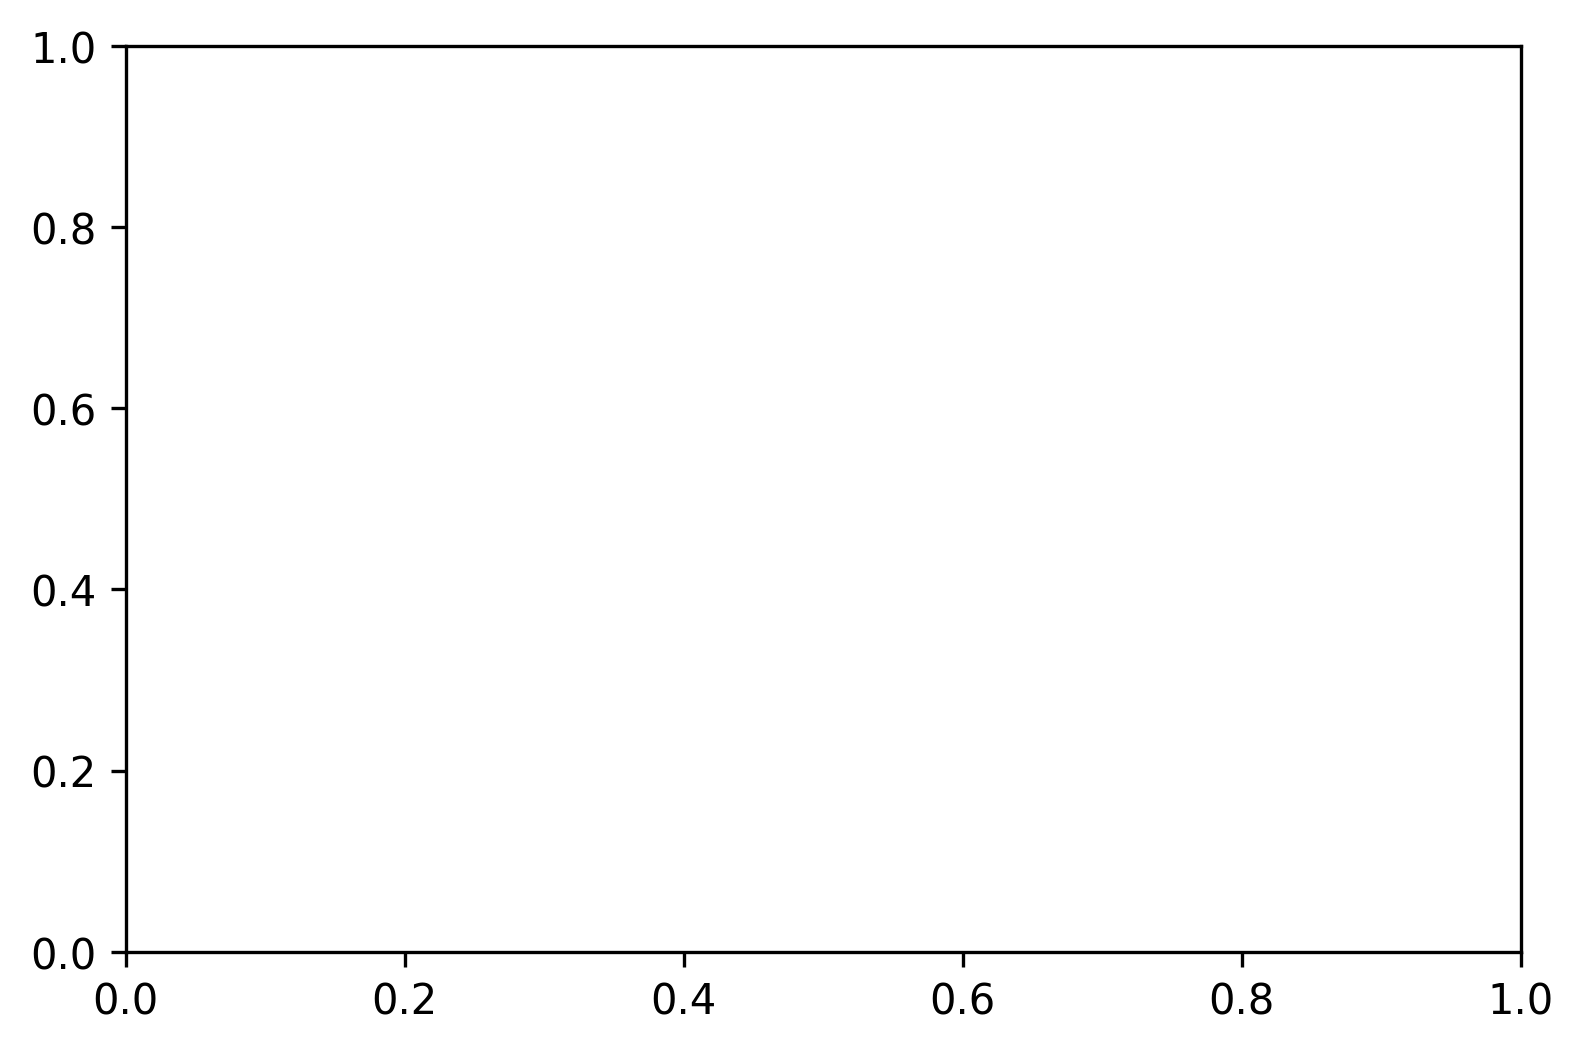

In [24]:
#Plot the clusters obtained using k means
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
scatter = ax.scatter(data_df['mean_log_gfp_live'],data_df[y_col],
                     c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('log GFP')
ax.set_ylabel('Correctness')
plt.colorbar(scatter)

In [20]:
df[['strain_name', 'gate', 'input']].drop_duplicates()

strain_name  gate input
0    https://hub.sd2e.org/user/sd2e/design/UWBF_5992/1   OR    11  
1    https://hub.sd2e.org/user/sd2e/design/UWBF_5783/1   OR    10  
2    https://hub.sd2e.org/user/sd2e/design/UWBF_7377/1   XNOR  10  
3    https://hub.sd2e.org/user/sd2e/design/UWBF_7299/1   XNOR  11  
4    https://hub.sd2e.org/user/sd2e/design/UWBF_6391/1   NOR   11  
5    https://hub.sd2e.org/user/sd2e/design/UWBF_7374/1   AND   11  
6    https://hub.sd2e.org/user/sd2e/design/UWBF_6389/1   NOR   10  
8    https://hub.sd2e.org/user/sd2e/design/UWBF_6390/1   NOR   00  
9    https://hub.sd2e.org/user/sd2e/design/UWBF_6388/1   NOR   01  
10   https://hub.sd2e.org/user/sd2e/design/UWBF_7300/1   XNOR  00  
20   https://hub.sd2e.org/user/sd2e/design/UWBF_7375/1   AND   01  
21   https://hub.sd2e.org/user/sd2e/design/UWBF_7373/1   AND   10  
24   https://hub.sd2e.org/user/sd2e/design/UWBF_8231/1   XNOR  01  
34   https://hub.sd2e.org/user/sd2e/design/UWBF_8225/1   OR    00  
56   https://hub.sd2e.org/user/sd2e/design/UWBF_7376/1   AND   00  
69   https://hub.sd2e.org/user/sd2e/design/UWBF_5993/1   OR    01  
88   https://hub.sd2e.org/user/sd2e/design/UWBF_8542/1   NAND  11  
92   https://hub.sd2e.org/user/sd2e/design/UWBF_8543/1   NAND  10  
96   https://hub.sd2e.org/user/sd2e/design/UWBF_16968/1  XOR   10  
103  https://hub.sd2e.org/user/sd2e/design/UWBF_16967/1  XOR   11  
104  https://hub.sd2e.org/user/sd2e/design/UWBF_8545/1   NAND  01  
105  https://hub.sd2e.org/user/sd2e/design/UWBF_16969/1  XOR   01  
106  https://hub.sd2e.org/user/sd2e/design/UWBF_16970/1  XOR   00  
121  https://hub.sd2e.org/user/sd2e/design/UWBF_8544/1   NAND  00

In [4]:
y_col = 'mean_correct_classifier_live'
correctness_cols = ['mean_correct_threshold', 'mean_correct_classifier', 'mean_correct_threshold_live', 
                    'std_correct_threshold_live','std_correct_classifier_live', 'std_correct_threshold',
                   'std_correct_classifier', 'mean_correct_low_classifier_live', 'mean_correct_high_classifier_live',
                    'mean_correct_low_classifier', 'mean_correct_high_classifier', 
                    'mean_correct_low_threshold_live', 'mean_correct_high_threshold_live',
                    'mean_correct_low_threshold', 'mean_correct_high_threshold',
                   'std_correct_low_classifier_live', 'std_correct_high_classifier_live',
                    'std_correct_low_classifier', 'std_correct_high_classifier', 
                    'std_correct_low_threshold_live', 'std_correct_high_threshold_live',
                    'std_correct_low_threshold', 'std_correct_high_threshold']
output_location = '.'
#ignore_cols = ['filename', 'id', 'lab_id', 'plan', 'source_container', 'strain_name', 'plate_id']
ignore_cols = ['filename', 'id', 'lab_id', 'plan', 'source_container', 'gate', 'input', 'plate_id',
              #'mean_log_gfp_live', 
               'mean_log_gfp', 'threshold_live', 'threshold', 'std_log_gfp', 
               #'std_log_gfp_live'
              ]
ignore_cols.extend(correctness_cols)
description = 'foo'

data_df = df
data_df = data_df.loc[(data_df['gate'] == 'NOR') & (data_df['input'] == '11')]


data_df = pd.get_dummies(data_df.drop(columns=ignore_cols)).dropna()
#data_df

In [127]:

#threshold = 5.5
#data_df = data_df.loc[((data_df['mean_log_gfp_live'] < threshold) & (data_df['output'].astype(int) == 1)) |
#             ((data_df['mean_log_gfp_live'] >= threshold) & (data_df['output'].astype(int) == 0))]

#print(data_df.columns.values)

input_cols = list(data_df.columns.values)
input_cols = [x for x in input_cols if x not in ignore_cols and x != y_col]
output_cols = [y_col]

l.debug("Splitting Test Harness Data ...")
train, test = train_test_split(data_df, #stratify=df[y_col],
                               test_size=0.2, random_state=5)
th = TestHarness(output_location=output_location)

data_df = data_df.copy()
data_df.loc[:, y_col] = data_df.index

l.debug("Running Test Harness ...")
#rf_classification_model = random_forest_classification(n_estimators=500)
th.run_custom(#test_harness_models=rf_classification_model,
              function_that_returns_TH_model=random_forest_regression,
              dict_of_function_parameters={},
                   training_data=train, 
                   testing_data=test,
                   data_and_split_description=description,
                   cols_to_predict=output_cols,
                   index_cols=input_cols+output_cols,
                   feature_cols_to_use=input_cols, 
                   normalize=True, 
                   feature_cols_to_normalize=input_cols,
                   feature_extraction=Names.RFPIMP_PERMUTATION,
                   predict_untested_data=False)



▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:21:33
Normalizing training and testing splits...
Starting Regression training...
Training time was: 0.58 seconds
Testing time was: 0.11 seconds
Starting Feature Extraction...
Feature Extraction time with method rfpimp_permutation was: 9.36 seconds

          Run ID        Date      Time Model Name Model Author  R-Squared   RMSE Samples In Train Samples In Test                                                                                                                     Model Description              Column Predicted Num Features Used Data and Split Description Normalized Num Features Normalized  Feature Extraction Was Untested Data Predicted
0  Q7GNY8alOLdgo  2019-06-19  19:21:33  __init__   Hamed        0.946      0.102  224              56              Random Forest: bootstrap=False, min_samples_leaf=1, n_estimators=689, min_samples_split=2, max_features=0

In [128]:
l.debug("Extracting Test Harness Predictions ...")
leader_board = pd.read_html(os.path.join(output_location, 'test_harness_results/custom_regression_leaderboard.html'))[0]
leader_board = leader_board.sort_values(by=['Date', 'Time'], ascending=True)
l.debug("Selecting run: " + str(leader_board.iloc[-1, :]))
run = leader_board.loc[:,'Run ID'].iloc[-1]
#print(run)
run_path = os.path.join(output_location, 'test_harness_results/runs/', "run_" + run)
features_path = os.path.join(run_path, 'feature_importances.csv')

features_df = pd.read_csv(features_path, index_col=None)
features_df.sort_values(by=['Importance'], ascending=False)

Feature    Importance
0   count                                                          9.699482e-01
1   count_live                                                     1.571328e-01
2   inc_temp                                                       8.004337e-02
3   inc_time_2                                                     3.386621e-02
4   od                                                             1.191906e-02
5   growth_media_1_slow_media                                      8.913414e-03
6   media_SC Slow                                                  5.798295e-03
7   growth_media_2_standard_media                                  4.171855e-03
8   growth_media_1_standard_media                                  4.063694e-03
9   media_SC Media                                                 2.928683e-03
10  growth_media_2_slow_media                                      2.854097e-03
11  index                                                          2.453011e-03
12  inc_time_1_16:hour                                             1.212738e-03
13  growth_media_1_high_osm_media                                  6.024238e-04
14  growth_media_2_high_osm_media                                  7.240803e-05
15  well_h5                                                        1.568811e-05
24  well_c1                                                        1.110223e-16
31  well_c9                                                        1.110223e-16
30  well_e6                                                        1.110223e-16
29  well_a9                                                        1.110223e-16
28  well_d4                                                        1.110223e-16
27  well_d5                                                        1.110223e-16
25  well_e7                                                        1.110223e-16
26  well_f7                                                        1.110223e-16
23  well_b5                                                        1.110223e-16
19  well_g4                                                        1.110223e-16
22  well_g10                                                       1.110223e-16
17  well_a3                                                        1.110223e-16
18  well_h8                                                        1.110223e-16
16  well_b8                                                        1.110223e-16
..      ...                                                                 ...
41  output_0.0                                                     0.000000e+00
52  well_c2                                                        0.000000e+00
40  well_e11                                                       0.000000e+00
32  lab_transcriptic                                               0.000000e+00
33  well_c11                                                       0.000000e+00
34  strain_name_https://hub.sd2e.org/user/sd2e/design/UWBF_6391/1  0.000000e+00
35  well_a10                                                       0.000000e+00
36  well_a11                                                       0.000000e+00
51  well_e2                                                        0.000000e+00
38  od_cutoff                                                      0.000000e+00
39  well_a7                                                        0.000000e+00
37  well_a6                                                        0.000000e+00
42  well_c6                                                        0.000000e+00
43  well_b3                                                        0.000000e+00
44  well_h9                                                        0.000000e+00
45  well_c7                                                        0.000000e+00
46  well_d2                                                        0.000000e+00
47  well_d3                                                        0.000000e+00
48  well_d6                                               

In [32]:
print(str(features_df.values))

[['output' 0.8822543601313488]
 ['mean_log_gfp_live' 0.28812872559074465]
 ['mean_log_gfp' 0.19065501698273055]
 ['count' 0.06882180476664301]
 ['strain_name_https://hub.sd2e.org/user/sd2e/design/UWBF_5783/1'
  0.043014986103764086]
 ['threshold' 0.03350214611818558]
 ['strain_name_https://hub.sd2e.org/user/sd2e/design/UWBF_5993/1'
  0.027123908832162424]
 ['strain_name_https://hub.sd2e.org/user/sd2e/design/UWBF_16969/1'
  0.02483082059954167]
 ['threshold_live' 0.018116769321580902]
 ['count_live' 0.017801279909545498]
 ['std_log_gfp_live' 0.01682408964602955]
 ['std_log_gfp' 0.011606861507090005]
 ['o_r3' 0.007097417583819209]
 ['d_r3' 0.006158052217531296]
 ['strain_name_https://hub.sd2e.org/user/sd2e/design/UWBF_7374/1'
  0.005385086581763732]
 ['inc_time_2' 0.004170333711360552]
 ['e_r3' 0.0040168509571545385]
 ['d_r5' 0.0035937054291358406]
 ['d_r6' 0.0035035383201633685]
 ['e_r6' 0.0033638513623246435]
 ['strain_name_https://hub.sd2e.org/user/sd2e/design/UWBF_8225/1'
  0.0032243

NameError: name 'y_col' is not defined

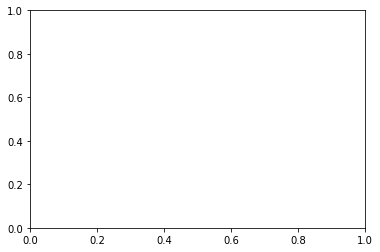

In [3]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()

or_df=df.loc[df['gate'] == 'NOR']

ax.hist(or_df[y_col])
#ax.scatter(high_df['mean_correct_threshold_live'], high_df['mean_correct_classifier_live'], c='orange', label="High Output", alpha=0.25)
#ax.scatter(low_df['mean_correct_threshold_live'], low_df['mean_correct_classifier_live'], c='blue', label="Low Output", alpha=0.25)
#ax.legend()
plt.xlabel("Correctness")
plt.ylabel("# Samples")
plt.title("Correctness of Circuit (Classifier Live)")


Text(0.5, 1.0, 'Correctness of Circuit (Classifier Live)')

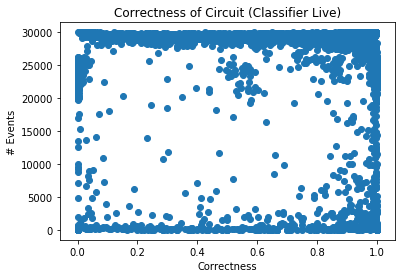

In [22]:
fig = plt.figure()
ax = plt.axes()

#or_df=df.loc[df['gate'] == 'OR']

ax.scatter(df[y_col], df['count'])
#ax.scatter(high_df['mean_correct_threshold_live'], high_df['mean_correct_classifier_live'], c='orange', label="High Output", alpha=0.25)
#ax.scatter(low_df['mean_correct_threshold_live'], low_df['mean_correct_classifier_live'], c='blue', label="Low Output", alpha=0.25)
#ax.legend()
plt.xlabel("Correctness")
plt.ylabel("# Events")
plt.title("Correctness of Circuit (Classifier Live)")



In [65]:
df[y_col].unique()

array([0.9015396 , 0.01558926, 0.95027555, ..., 0.8576257 , 0.85965642,
       0.36420966])

In [170]:
#df.loc[(df['gate'] == 'OR') & (df['output'] == '11') ]
import numpy as np
bins= np.arange(0, 0.01, 0.0001)
odg = np.digitize(mdf['od'], bins)

mdf=df.loc[(df['gate'] == 'NOR') & (df['input'] == '11') ]

print(mdf.loc[(mdf[y_col] >= 0.5) & (mdf['inc_time_2'] == 18.0)]['media'].value_counts())
mdf.loc[(mdf[y_col] < 0.5) & (mdf['inc_time_2'] == 18.0)]['media'].value_counts()

SC Media       76
SC Slow        15
SC High Osm    12
Name: media, dtype: int64


SC Media       92
SC High Osm    12
SC Slow        10
Name: media, dtype: int64

Text(0.5, 1.0, "Correctness by ['lab_id']")

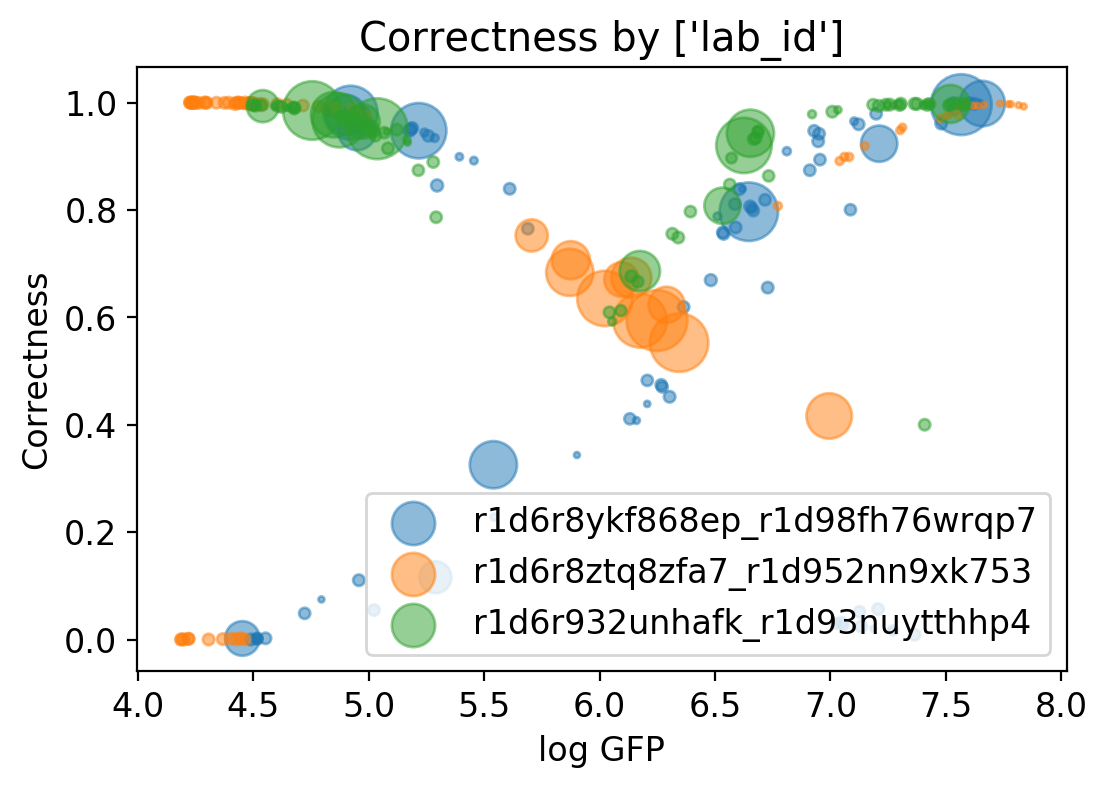

In [8]:
fig = plt.figure(dpi=200)
ax = plt.axes()



size='std_log_gfp_live'
scale=15
#size='count_live'
#scale = 2.0

mdf=df.loc[df['inc_time_2'] == 12]

mdf.loc[:,'size'] = mdf.apply(lambda x: scale**x[size], axis=1)

grouping=['lab_id']
plt.rcParams['font.size'] = 12
groups = mdf.groupby(grouping)

for i, group in groups:
    ax.scatter(group['mean_log_gfp_live'],group['mean_correct_classifier_live'], label=i, alpha=0.5, s=mdf['size'])
#ax.scatter(mdf['mean_log_gfp_live'],mdf['mean_correct_high_classifier_live'], label="High Output", alpha=0.1, s=mdf['size'])
ax.legend()
plt.xlabel("log GFP")
plt.ylabel("Correctness")
plt.title("Correctness by " + str(grouping))

Text(0.5, 1.0, "Correctness by ['media']")

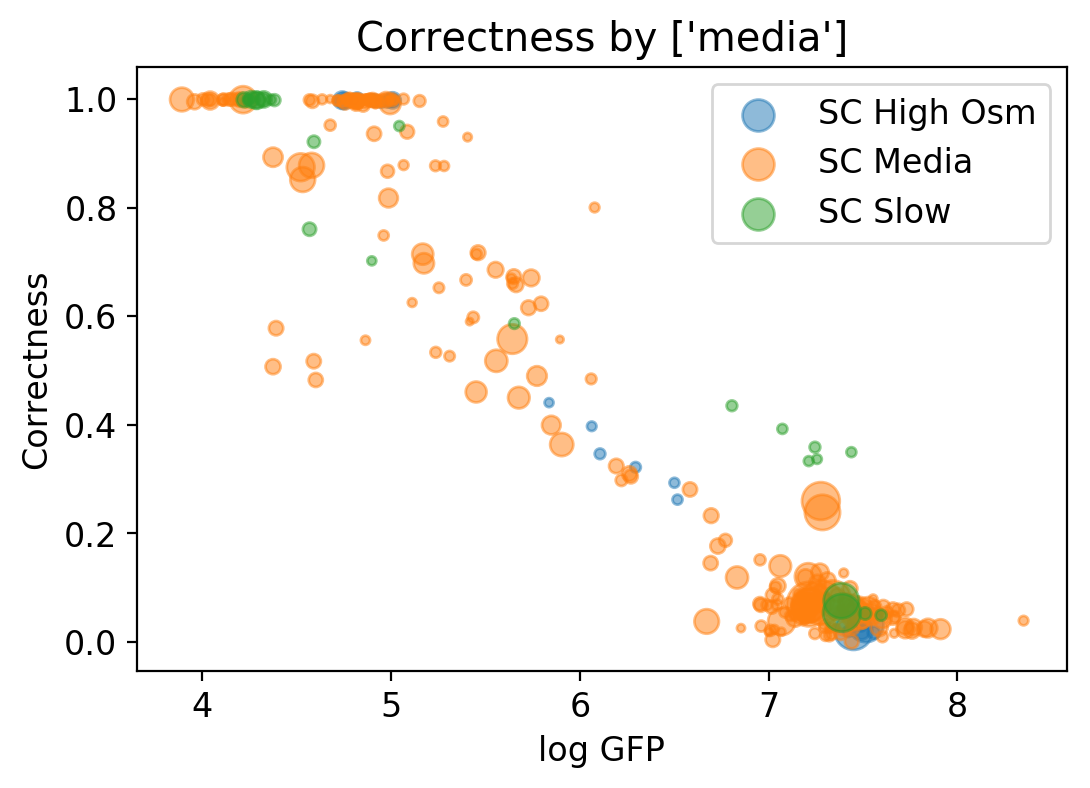

In [169]:
fig = plt.figure(dpi=200)
ax = plt.axes()



size='std_log_gfp_live'
scale=15
#size='count_live'
#scale = 2.0

mdf.loc[:,'size'] = mdf.apply(lambda x: scale**x[size], axis=1)

grouping=['media']
plt.rcParams['font.size'] = 12
groups = mdf.groupby(grouping)

for i, group in groups:
    ax.scatter(group['mean_log_gfp_live'],group['mean_correct_classifier_live'], label=i, alpha=0.5, s=mdf['size'])
#ax.scatter(mdf['mean_log_gfp_live'],mdf['mean_correct_high_classifier_live'], label="High Output", alpha=0.1, s=mdf['size'])
ax.legend()
plt.xlabel("log GFP")
plt.ylabel("Correctness")
plt.title("Correctness by " + str(grouping))

In [8]:
for i in range(1,11):
    df.loc[:, 'd_r'+str(i)] = df['e_r'+str(i)] - df['o_r'+str(i)]
df

count  count_live                                                                                                                                        filename  gate  growth_media_1  growth_media_2                         id  inc_temp inc_time_1  inc_time_2    index input           lab                       lab_id  mean_correct_classifier  mean_correct_classifier_live  mean_correct_threshold  mean_correct_threshold_live  mean_log_gfp  mean_log_gfp_live     media        od  od_cutoff  output                 plan  plate_id  replicate source_container  std_correct_classifier  std_correct_classifier_live  std_correct_threshold  std_correct_threshold_live  std_log_gfp  std_log_gfp_live                                         strain_name  threshold  threshold_live well  e_r1  e_r2  e_r3  e_r4  e_r5  e_r6  e_r7  e_r8  e_r9  e_r10  o_r1  o_r2  o_r3  o_r4  o_r5  o_r6  o_r7  o_r8  o_r9  o_r10  d_r1  d_r2  d_r3  d_r4  d_r5  d_r6  d_r7  d_r8  d_r9  d_r10
0     29906.0  18901.0     /work/projects/SD2E-Community/prod/projects/sd2e-project-14/xplan-reactor/fcs/YeastGates-12-07-2018-Run5_Sytox-YeastGates_SytoxYG-Plate_A1.fcs  OR    standard_media  standard_media  2018_12_03_22_57_54_1_A1   30.0      18:hour    18.0        0        11    transcriptic  r1c84xwx57y95_r1c8ejz8jfg9z  0.973300                 0.966851                      0.921387                0.901540                     6.770841      6.910869           SC Media  0.000750  0.1        1       2018_12_03_22_57_54  1         0          ct1bvwm8brkpg2   0.161208                0.179029                     0.001556               0.002167                    1.020506     0.966403          https://hub.sd2e.org/user/sd2e/design/UWBF_5992/1   5.421515   5.587442        a1   0.0   1.0   1.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0    1.0   1.0   1.0   0.0   1.0   0.0   1.0   0.0   0.0   1.0   -1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  -1.0  
1     22004.0  21425.0     /work/projects/SD2E-Community/prod/projects/sd2e-project-14/xplan-reactor/fcs/YeastGates-12-07-2018-Run5_Sytox-YeastGates_SytoxYG-Plate_B1.fcs  OR    standard_media  standard_media  2018_12_03_22_57_54_1_B1   30.0      18:hour    18.0        30000    10    transcriptic  r1c84xwx57y95_r1c8ejz8jfg9z  0.002367                 0.000921                      0.035085                0.015589                     3.921465      3.904025           SC Media  0.000750  0.1        1       2018_12_03_22_57_54  1         0          ct1bvwm8brkpg2   0.048592                0.030342                     0.001240               0.000846                    1.048261     1.036942          https://hub.sd2e.org/user/sd2e/design/UWBF_5783/1   5.421515   5.587442        b1   0.0   1.0   1.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0    1.0   1.0   1.0   0.0   1.0   0.0   1.0   0.0   0.0   1.0   -1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  -1.0  
2     24725.0  23952.0     /work/projects/SD2E-Community/prod/projects/sd2e-project-14/xplan-reactor/fcs/YeastGates-12-07-2018-Run5_Sytox-YeastGates_SytoxYG-Plate_C1.fcs  XNOR  standard_media  standard_media  2018_12_03_22_57_54_1_C1   30.0      18:hour    18.0        60000    10    transcriptic  r1c84xwx57y95_r1c8ejz8jfg9z  0.981167                 0.980791                      0.917654                0.950276                     4.209854      4.186770           SC Media  0.000750  0.1        0       2018_12_03_22_57_54  1         0          ct1bvwm8brkpg2   0.135938                0.137261                     0.001748               0.001405                    1.037666     1.023284          https://hub.sd2e.org/user/sd2e/design/UWBF_7377/1   5.421515   5.587442        c1  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3     29757.0  18697.0     /work/projects/SD2E-Community/prod/projects/sd2e-project-14/xplan-reactor/fcs/YeastGates-12-07-2018-Run5_Sytox-Ye

Text(0.5, 1.0, 'Unexpected gRNA presence/absence')

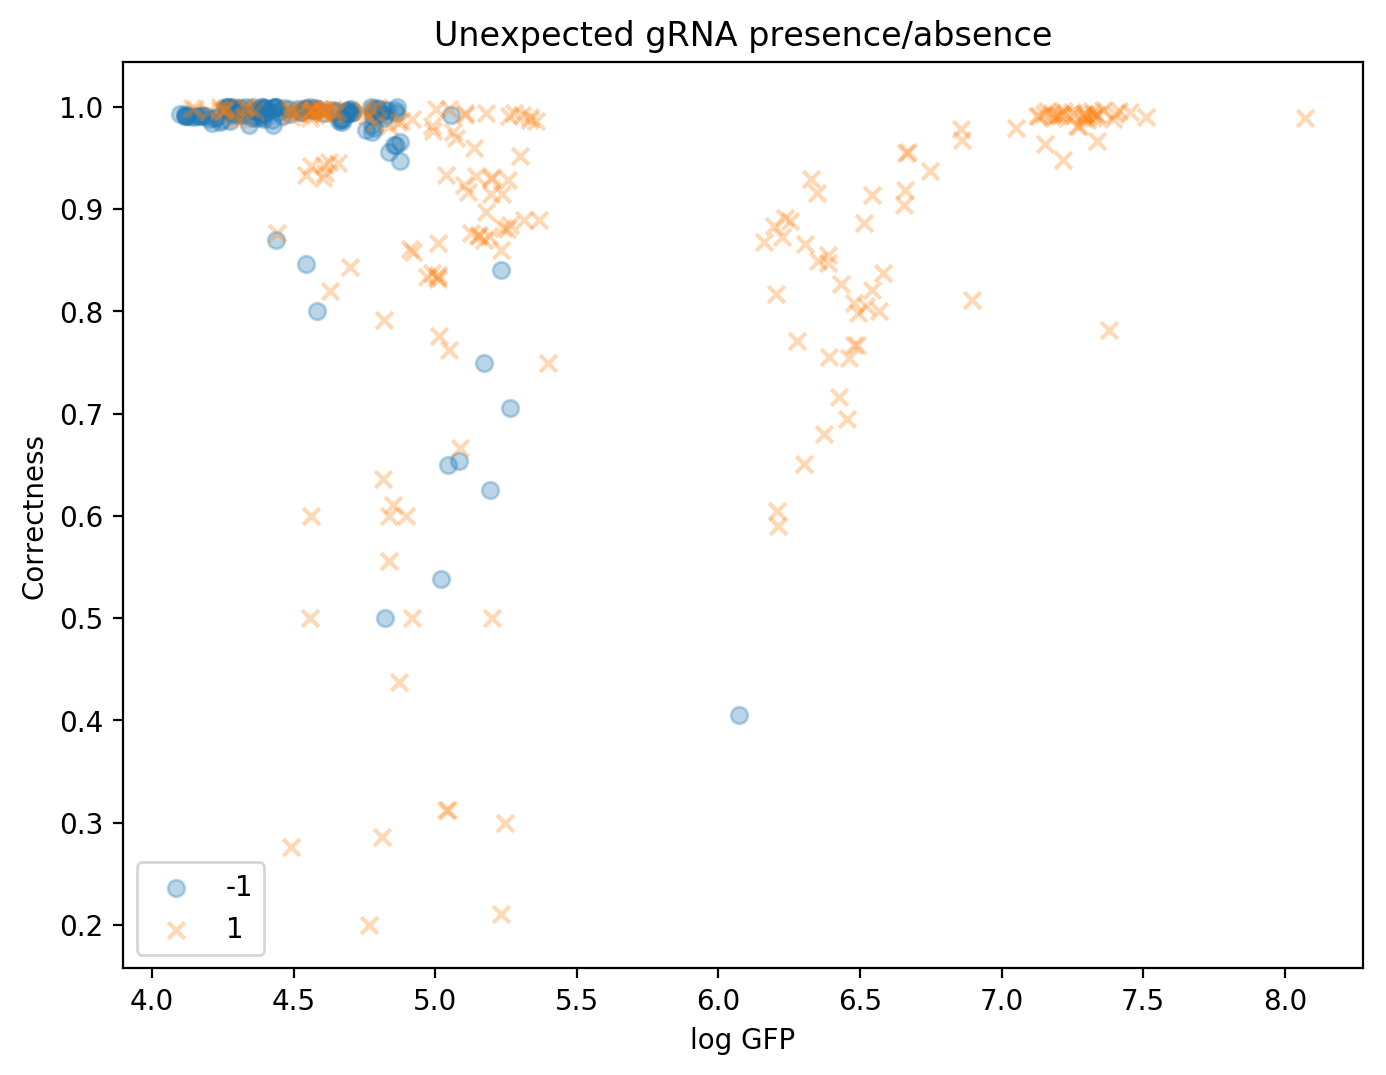

In [15]:
fig = plt.figure(figsize=(8, 6), dpi=200)
ax = plt.axes()

correctness='mean_correct_classifier_live'

markers = {
    -1 : 'o',
    1 : 'x'
}

#Remove TP and TN
threshold = 5.5
#mdf = df.loc[((df['mean_log_gfp_live'] < threshold) & (df['output'].astype(int) == 1)) |
#             ((df['mean_log_gfp_live'] >= threshold) & (df['output'].astype(int) == 0))]
mdf=df.dropna()
#mdf.loc[:,'marker'] = mdf.apply(get_marker,axis=1)
gate='OR'
r='r2'
#mdf = mdf.loc[(mdf['count_live'] > 0) &(mdf['gate'] == gate) ].dropna()
mdf = mdf.loc[(mdf['count_live'] > 0) ].dropna()
#mdf = df.loc[df['e_r3'].astype(int) == 0]

#print(mdf.loc[mdf['input'] == '11'])

#e00_df = mdf.loc[(mdf['e_'+r].astype(int) == mdf['o_'+r].astype(int))]
#e01_df = mdf.loc[(mdf['e_'+r].astype(int) != mdf['o_'+r].astype(int))]
#e10_df = mdf.loc[(mdf['e_'+r].astype(int) == 1) & (mdf['o_'+r].astype(int) == 0)]
#e11_df = mdf.loc[(mdf['e_'+r].astype(int) == 1) & (mdf['o_'+r].astype(int) == 1)]
x='mean_log_gfp_live'
#x='count_live'
#print(e11_df['input'].unique())
#for label, edf in {'00':e00_df, '01':e01_df, '10':e10_df, '11':e11_df}.items():
#for label, edf in {'=':e00_df, '!':e01_df}.items():
#    for i in edf.input.unique():
#        ax.scatter(edf.loc[edf['input']==i][x],edf.loc[edf['input']==i][correctness], alpha=0.3, label=label+'_'+i, marker=markers[i])

for i in range(3,4):
    for j in [-1, 1]:
        col='d_r'+str(i)
        ax.scatter(mdf.loc[ mdf[col] == j][x],mdf.loc[mdf[col] == j][correctness], alpha=0.3, label=str(j), marker=markers[j])
#ax.scatter(mdf.loc[ (mdf['d_r2'] == 1) | (mdf['d_r3'] == 1) |(mdf['d_r5'] == -1) ][x],mdf.loc[(mdf['d_r2'] == 1) | (mdf['d_r3'] == 1) |(mdf['d_r5'] == -1)][correctness], alpha=0.3, label=str(j), marker=markers[j])
ax.legend()
plt.xlabel("log GFP")
plt.ylabel("Correctness")
plt.title("Unexpected gRNA presence/absence")

In [366]:
df.loc[df[correctness] < 0.1]['d_r6'].value_counts()

1.0    398
0.0    61 
Name: d_r6, dtype: int64

/Users/danbryce/xplan/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/danbryce/xplan/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


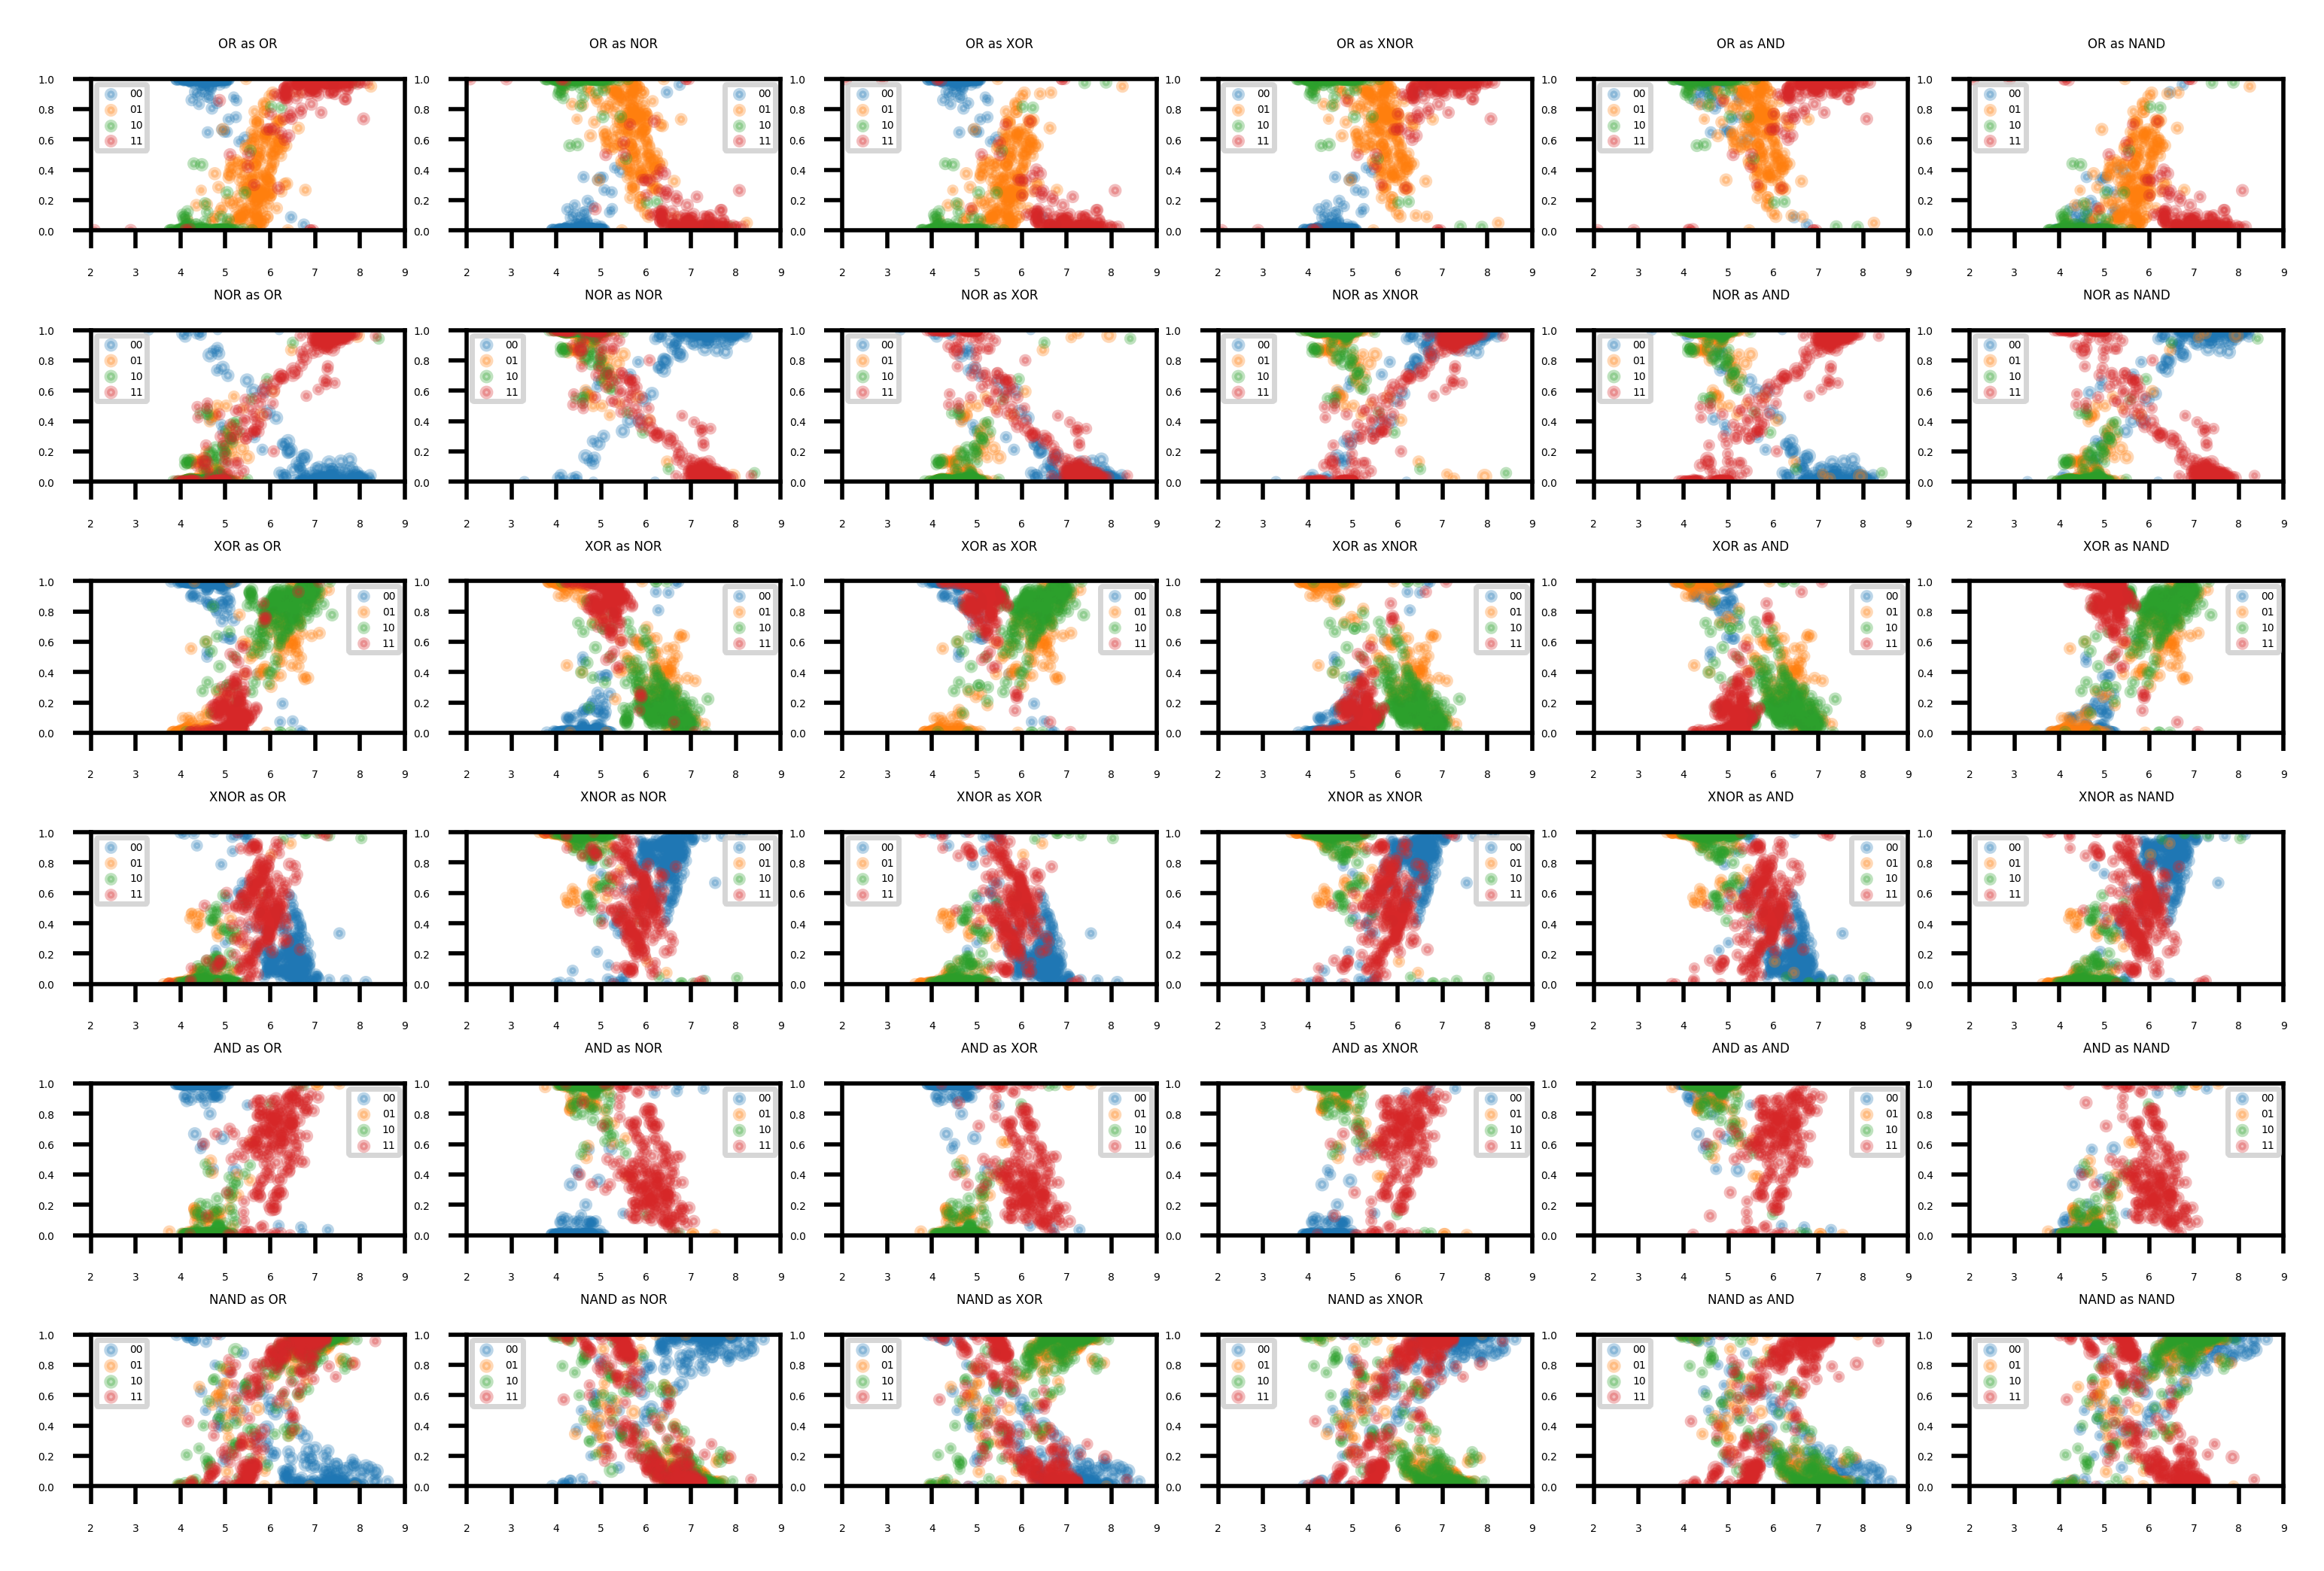

In [119]:
#fig = plt.figure()
#ax = plt.axes()

correctness='mean_correct_classifier_live'

#Remove TP and TN
threshold = 5.5
#mdf = df.loc[((df['mean_log_gfp_live'] < threshold) & (df['output'].astype(int) == 1)) |
#             ((df['mean_log_gfp_live'] >= threshold) & (df['output'].astype(int) == 0))]
#mdf=df
#mdf = df.loc[(df['gate'] == "AND") & (df['media'] == "SC Slow") ]
gates = ["OR", "NOR", "XOR", "XNOR", "AND", "NAND"]
mgates = ["OR", "NOR", "XOR", "XNOR", "AND", "NAND"]

truth_table = {
    "XNOR" : { "00" : 1, "01" : 0, "10" : 0, "11" : 1},
    "AND" : { "00" : 0, "01" : 0, "10" : 0, "11" : 1},
    "NAND" : { "00" : 1, "01" : 1, "10" : 1, "11" : 0},
    "NOR" : { "00" : 1, "01" : 0, "10" : 0, "11" : 0},
    "OR" : { "00" : 0, "01" : 1, "10" : 1, "11" : 1},
    "XOR" : { "00" : 0, "01" : 1, "10" : 1, "11" : 0}
}
plt.rcParams['font.size'] = 2
fig, ax = plt.subplots(nrows=len(gates), ncols=len(mgates), dpi=500)
#plt.xtics(gates)
#plt.ytics(mgates)


for i, row in enumerate(ax):
    for j, col in enumerate(row):

        mdf = df.loc[(df['gate'] == gates[i])  ]
        zz_df = mdf.loc[mdf['input'] == '00']
        zo_df = mdf.loc[mdf['input'] == '01']
        oz_df = mdf.loc[mdf['input'] == '10']
        oo_df = mdf.loc[mdf['input'] == '11']

        zz_df.loc[:,'size'] = zz_df.apply(lambda x: 2**x['std_log_gfp_live'], axis=1)
        zo_df.loc[:,'size'] = zo_df.apply(lambda x: 2**x['std_log_gfp_live'], axis=1)
        oz_df.loc[:,'size'] = oz_df.apply(lambda x: 2**x['std_log_gfp_live'], axis=1)
        oo_df.loc[:,'size'] = oo_df.apply(lambda x: 2**x['std_log_gfp_live'], axis=1)



        def get_correctness_column(input, mgate):
            output = truth_table[mgate][input]
            if output == 1:
                return 'mean_correct_high_classifier_live'
            else:
                return 'mean_correct_low_classifier_live'

        col.scatter(zz_df['mean_log_gfp_live'],zz_df[get_correctness_column('00', mgates[j])], label="00", alpha=0.3, s=zz_df['size'])
        col.scatter(zo_df['mean_log_gfp_live'],zo_df[get_correctness_column('01', mgates[j])], label="01", alpha=0.3, s=zz_df['size'])
        col.scatter(oz_df['mean_log_gfp_live'],oz_df[get_correctness_column('10', mgates[j])], label="10", alpha=0.3, s=zz_df['size'])
        col.scatter(oo_df['mean_log_gfp_live'],oo_df[get_correctness_column('11', mgates[j])], label="11", alpha=0.3, s=zz_df['size'])
        col.set_title(gates[i] + " as " + mgates[j])
        col.set_xlim([2,9])
        col.set_ylim([0,1])
        col.legend()
        #col.set_xlabel("log GFP")
        #col.set_ylabel("Corr.")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#ax.scatter(high_df['mean_correct_threshold_live'], high_df['mean_correct_classifier_live'], c='orange', label="High Output", alpha=0.25)
#ax.scatter(low_df['mean_correct_threshold_live'], low_df['mean_correct_classifier_live'], c='blue', label="Low Output", alpha=0.25)
#ax.legend()
#plt.xlabel("log GFP")
#plt.ylabel("Correctness")
#plt.title("Correctness of " + gate + " as if it were " + mgate)

In [231]:
df.inc_time_2.unique()

array([18., 15.,  8., 16., 10.])

KeyError: 'size'

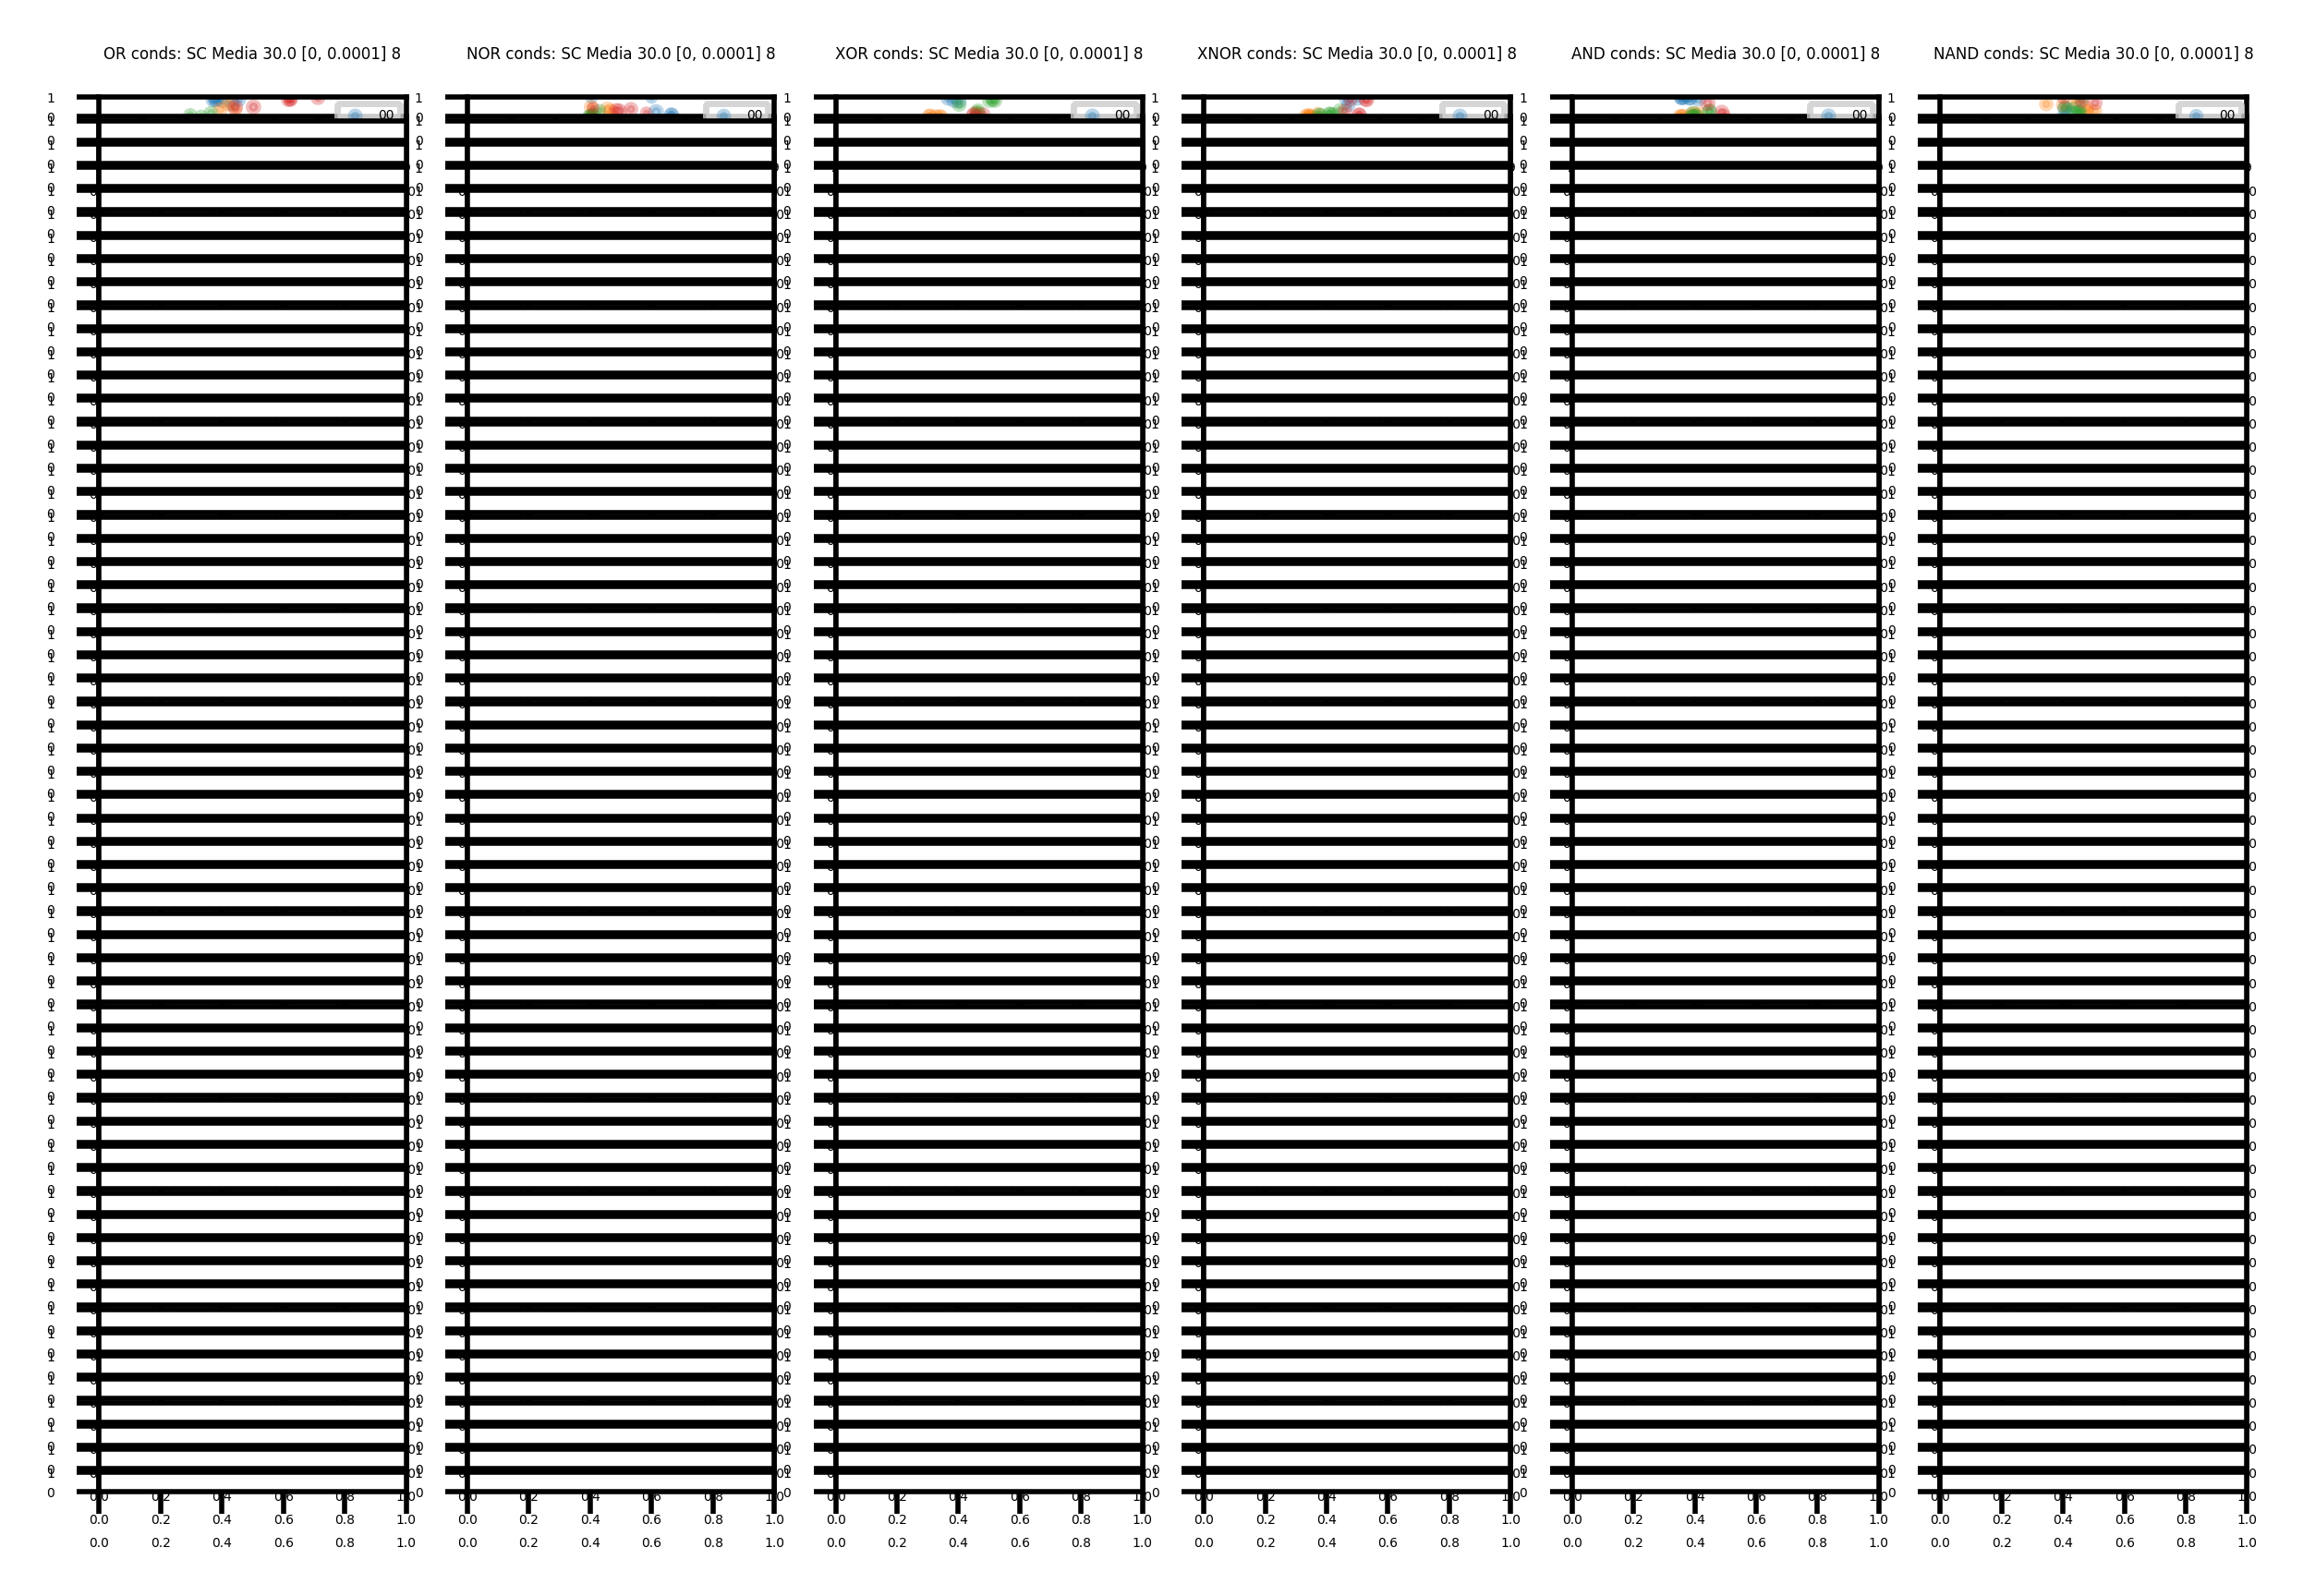

In [234]:
#fig = plt.figure()
#ax = plt.axes()
import copy

correctness='mean_correct_classifier_live'

#Remove TP and TN
threshold = 5.5
#mdf = df.loc[((df['mean_log_gfp_live'] < threshold) & (df['output'].astype(int) == 1)) |
#             ((df['mean_log_gfp_live'] >= threshold) & (df['output'].astype(int) == 0))]
#mdf=df
#mdf = df.loc[(df['gate'] == "AND") & (df['media'] == "SC Slow") ]
gates = ["OR", "NOR", "XOR", "XNOR", "AND", "NAND"]

factors = { 'media' : ['SC Media','SC Slow', 'SC High Osm'],
            'inc_temp' : [30.0, 37.0],
            'od' : [[0, 0.0001], [0.0001, 0.0002]],
            'inc_time_2' : [8, 10, 15, 16, 18] #FIXME add 12
          }

conditions= [
    {'media' : 'SC Media', 'inc_temp' : 30.0, 'od' : [0, 0.0001]},
    {'media' : 'SC Media', 'inc_temp' : 30.0, 'od' : [0.0001, 0.0002]},

#    {'media' : 'SC Slow', 'inc_temp' : 30.0},
#    {'media' : 'SC High Osm', 'inc_temp' : 30.0},
#    {'media' : 'SC Media', 'inc_temp' : 37.0},
#    {'media' : 'SC Slow', 'inc_temp' : 37.0},
#    {'media' : 'SC High Osm', 'inc_temp' : 37.0}
            ]


def combine_conditions(factors, conditions):
    #print(factors)
    if len(factors) == 0:
        return conditions
    else:
        first_key = list(factors.keys())[0]
        values = factors.pop(first_key)
        #print(factors)
        new_conditions = []
        for condition in conditions:
            for val in values:
                new_condition = copy.deepcopy(condition)
                new_condition[first_key] = val
                new_conditions.append(new_condition)
        final_conditions = combine_conditions(factors, new_conditions)
        factors[first_key] = values
        return final_conditions

conditions = [{}]
conditions = combine_conditions(factors, conditions)
#print(conditions)
    

plt.rcParams['font.size'] = 2
fig, ax = plt.subplots(ncols=len(gates), nrows=len(conditions), dpi=500)
#plt.xtics(gates)
#plt.ytics(mgates)


for i, row in enumerate(ax):
    for j, col in enumerate(row):

        mdf = df.loc[(df['gate'] == gates[j]) & \
                     (df['media'] == conditions[i]['media']) & \
                     (df['inc_temp'] == conditions[i]['inc_temp']) & \
                     (df['od'] >= conditions[i]['od'][0]) & \
                     (df['od'] < conditions[i]['od'][1]) & \
                     (df['inc_time_2'] == conditions[i]['inc_time_2'])
                    ]
        
        if len(mdf) == 0:
            continue
        
        zz_df = mdf.loc[mdf['input'] == '00']
        zo_df = mdf.loc[mdf['input'] == '01']
        oz_df = mdf.loc[mdf['input'] == '10']
        oo_df = mdf.loc[mdf['input'] == '11']

        if(len(zz_df) > 0):
            zz_df.loc[:,'size'] = zz_df.apply(lambda x: 2**x['std_log_gfp_live'], axis=1)
            col.scatter(zz_df['mean_log_gfp_live'],zz_df[get_correctness_column('00', gates[i])], label="00", alpha=0.3, s=zz_df['size'])
        if(len(zo_df) > 0):
            zo_df.loc[:,'size'] = zo_df.apply(lambda x: 2**x['std_log_gfp_live'], axis=1)
            col.scatter(zo_df['mean_log_gfp_live'],zo_df[get_correctness_column('01', gates[i])], label="01", alpha=0.3, s=zz_df['size'])
        if(len(oz_df) > 0):
            oz_df.loc[:,'size'] = oz_df.apply(lambda x: 2**x['std_log_gfp_live'], axis=1)
            col.scatter(oz_df['mean_log_gfp_live'],oz_df[get_correctness_column('10', gates[i])], label="10", alpha=0.3, s=zz_df['size'])
        if(len(oo_df) > 0):
            oo_df.loc[:,'size'] = oo_df.apply(lambda x: 2**x['std_log_gfp_live'], axis=1)
            col.scatter(oo_df['mean_log_gfp_live'],oo_df[get_correctness_column('11', gates[i])], label="11", alpha=0.3, s=zz_df['size'])




        def get_correctness_column(input, mgate):
            output = truth_table[mgate][input]
            if output == 1:
                return 'mean_correct_high_classifier_live'
            else:
                return 'mean_correct_low_classifier_live'

        col.set_title(gates[j] + " conds: " + \
                      conditions[i]['media'] + " " + \
                      str(conditions[i]['inc_temp']) + " " + \
                      str(conditions[i]['od'])  + " " + \
                      str(conditions[i]['inc_time_2'])
                     )
        col.set_xlim([2,9])
        col.set_ylim([0,1])
        col.legend()

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


Text(0.5, 1.0, 'Correctness by Output OR')

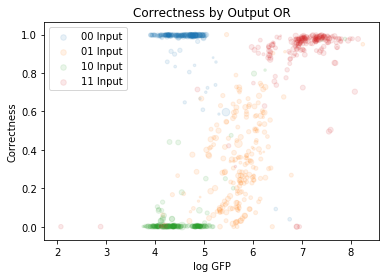

In [52]:
fig = plt.figure()
ax = plt.axes()

correctness='mean_correct_classifier_live'

#Remove TP and TN
threshold = 5.5
#mdf = df.loc[((df['mean_log_gfp_live'] < threshold) & (df['output'].astype(int) == 1)) |
#             ((df['mean_log_gfp_live'] >= threshold) & (df['output'].astype(int) == 0))]
#mdf=df
#mdf = df.loc[(df['gate'] == "AND") & (df['media'] == "SC Slow") ]
gate = "OR"

tt = {
    '00' : 1
}

mdf = df.loc[(df['gate'] == gate)  ]
zz_df = mdf.loc[mdf['input'] == '00']
zo_df = mdf.loc[mdf['input'] == '01']
oz_df = mdf.loc[mdf['input'] == '10']
oo_df = mdf.loc[mdf['input'] == '11']

zz_df.loc[:,'size'] = zz_df.apply(lambda x: 15**x['std_log_gfp_live'], axis=1)
zo_df.loc[:,'size'] = zo_df.apply(lambda x: 15**x['std_log_gfp_live'], axis=1)
oz_df.loc[:,'size'] = oz_df.apply(lambda x: 15**x['std_log_gfp_live'], axis=1)
oo_df.loc[:,'size'] = oo_df.apply(lambda x: 15**x['std_log_gfp_live'], axis=1)





ax.scatter(zz_df['mean_log_gfp_live'],zz_df[correctness], label="00 Input", alpha=0.1, s=zz_df['size'])
ax.scatter(zo_df['mean_log_gfp_live'],zo_df[correctness], label="01 Input", alpha=0.1, s=zz_df['size'])
ax.scatter(oz_df['mean_log_gfp_live'],oz_df[correctness], label="10 Input", alpha=0.1, s=zz_df['size'])
ax.scatter(oo_df['mean_log_gfp_live'],oo_df[correctness], label="11 Input", alpha=0.1, s=zz_df['size'])

#ax.scatter(high_df['mean_correct_threshold_live'], high_df['mean_correct_classifier_live'], c='orange', label="High Output", alpha=0.25)
#ax.scatter(low_df['mean_correct_threshold_live'], low_df['mean_correct_classifier_live'], c='blue', label="Low Output", alpha=0.25)
ax.legend()
plt.xlabel("log GFP")
plt.ylabel("Correctness")
plt.title("Correctness by Input for " + gate + " using " + mgate + " truth table")

Text(0.5, 1.0, 'Correctness by Media OR')

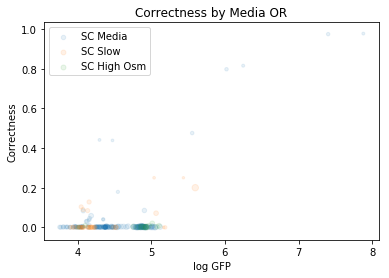

In [127]:
fig = plt.figure()
ax = plt.axes()


sdf_df = oz_df #.loc[oz['input'] == input]
for m in sdf_df.media.unique():
    ax.scatter(sdf_df.loc[sdf_df['media'] == m]['mean_log_gfp_live'],sdf_df.loc[sdf_df['media'] == m][correctness], label=m, alpha=0.1, s=sdf_df.loc[sdf_df['media'] == m]['size'])

ax.legend()

plt.xlabel("log GFP")
plt.ylabel("Correctness")
plt.title("Correctness by Media " + gate)

Text(0.5, 1.0, 'Correctness by Media OR')

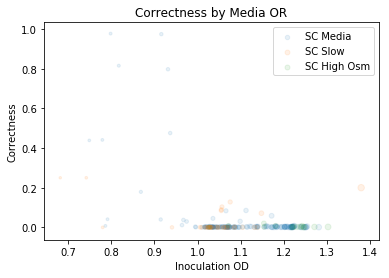

In [144]:
fig = plt.figure()
ax = plt.axes()


sdf_df = oz_df #.loc[oz['input'] == input]
for m in sdf_df.media.unique():
    ax.scatter(sdf_df.loc[sdf_df['media'] == m]['std_log_gfp_live'],sdf_df.loc[sdf_df['media'] == m][correctness], label=m, alpha=0.1, s=sdf_df.loc[sdf_df['media'] == m]['size'])

ax.legend()

plt.xlabel("Inoculation OD")
plt.ylabel("Correctness")
plt.title("Correctness by Media " + gate)